In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import shapiro


In [84]:
raw_data = pd.read_excel("../Paris housing Data Set 2 4050.xlsx")
housing_df = raw_data.copy(deep=True)
housing_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [85]:
housing_df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [86]:
# dtype_table = pd.DataFrame(housing_df.dtypes, columns=['Data Type'])
# dtype_table.index.name = 'Column Name'

# # Display the table
# dtype_table

In [87]:
housing_df.shape

(19999, 11)

In [88]:

dtype_table = pd.DataFrame(housing_df.isna().sum(), columns=['No of Missing Data (Nan)'])
dtype_table.index.name = 'Column Name'

# Display the table
dtype_table

,No of Missing Data (Nan)
Column Name,
price,4
bedrooms,15
bathrooms,11
sqft_living,1
sqft_total,5
floors,0
condition,1
grade,0
built,1


In [89]:
(housing_df.isna().sum()/len(housing_df))*100

Column Name
price               0.020001
bedrooms            0.075004
bathrooms           0.055003
sqft_living         0.005000
sqft_total          0.025001
floors              0.000000
condition           0.005000
grade               0.000000
built               0.005000
renovated           0.000000
living_area_sqft    0.030002
dtype: float64

In [90]:
nan_rows_count = housing_df.isna().all(axis=1).sum()
nan_rows_count

np.int64(0)

In [91]:
housing_df_without_nan = housing_df.dropna()
rows_with_nan_data = len(housing_df) - len(housing_df_without_nan)
print("Number of rows with NaN values is: ",rows_with_nan_data)
print("Percentage of rows with NaN values is: ",(rows_with_nan_data/len(housing_df))*100)

Number of rows with NaN values is:  37
Percentage of rows with NaN values is:  0.18500925046252312


In [92]:
# dataplot = sns.heatmap(housing_df_without_nan.corr(method="pearson"), cmap="YlGnBu", annot=True)

# # Displaying heatmap
# plt.show()

In [93]:
correlations = housing_df_without_nan.corr()['price'].drop('price')  # Drop self-correlation

# Find the most correlated column
most_correlated_column = correlations.idxmax()
highest_correlation_value = correlations.max()


In [94]:
most_correlated_column, highest_correlation_value

('sqft_living', np.float64(0.7010909427105703))

In [105]:
correlations = housing_df_without_nan.corr()['price'].drop('price')  # Drop self-correlation

# Find the most correlated column
least_correlated_column = correlations.idxmin()
least_correlation_value = correlations.min()
least_correlated_column, least_correlation_value

('bathrooms', np.float64(0.5247952867562538))

In [95]:
no_of_nan_rows_bed_and_bath = housing_df[['bedrooms', 'bathrooms']].isna().all(axis=1).sum()
no_of_nan_rows_bed_and_bath

np.int64(7)

In [96]:
housing_df.isna().sum()

Column Name
price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

In [97]:
# fill nan for bathrooms, bedrooms, and other values except price
housing_df[['bedrooms','sqft_total','living_area_sqft']] = housing_df[['bedrooms','sqft_total','living_area_sqft']].bfill()
housing_df['bathrooms'] = housing_df['bathrooms'].ffill()
housing_df[['sqft_living', 'condition','built']] = housing_df[['sqft_living', 'condition','built']].apply(lambda col: col.fillna(col.median()))
housing_df.isna().sum()

Column Name
price               4
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

### REPLACING NAN VALUES FOR PRICE COLUMN USING COSINE SIMILARITY

In [98]:
data_without_price = housing_df[housing_df.price.isna()]
data_without_price.reset_index(inplace=True)
dict_from_df_index = dict(zip( data_without_price.index, data_without_price["index"]))
data_without_price.drop(columns=['index'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18832\2234587514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_price.drop(columns=['index'], inplace=True)


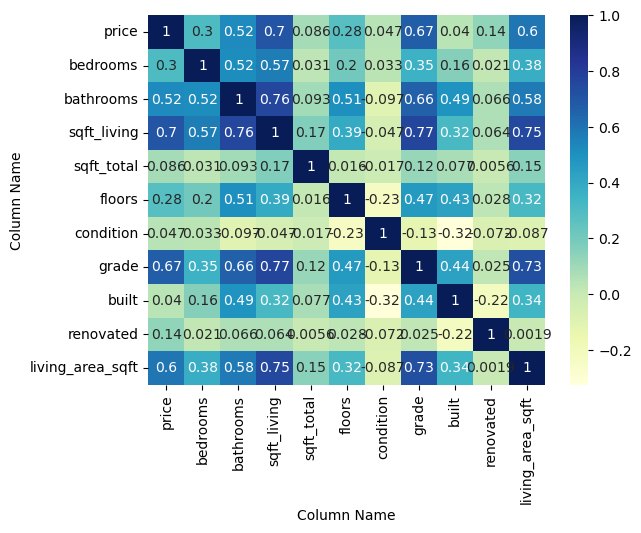

In [99]:
dataplot = sns.heatmap(housing_df_without_nan.corr(method="pearson"), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [100]:
column_list = ['price','grade','bathrooms','sqft_living','living_area_sqft']
data_without_price = data_without_price[column_list]
data_without_price

Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,NaN,9,2.25,2240.0,2440.0
1,NaN,7,1.50,1140.0,1200.0
2,NaN,10,2.75,3330.0,2390.0
3,NaN,10,2.50,2880.0,2640.0


In [101]:
## FILTER DF TO GET ONLY ROWS WITH VALUES IN SAME RANGE AS THOSE WITH ROWS HAVING MISSING PRICE
housing_df_without_nan = housing_df_without_nan[column_list]
filtered_df = housing_df_without_nan[
    (housing_df_without_nan["grade"].between(7, 10)) & 
    (housing_df_without_nan["bathrooms"].between(1, 3)) & 
    (housing_df_without_nan["sqft_living"].between(1100, 3340)) & 
    (housing_df_without_nan["living_area_sqft"].between(1190, 26650))
].reset_index(drop=True)  # Reset index
 
filtered_df

Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,221900.0,7,1.00,1180.0,1340.0
1,604000.0,7,3.00,1960.0,1360.0
2,510000.0,8,2.00,1680.0,1800.0
3,257500.0,7,2.25,1715.0,2238.0
4,229500.0,7,1.00,1780.0,1780.0
...,...,...,...,...,...
14014,439108.0,8,1.50,1130.0,1310.0
14015,260000.0,7,2.25,1489.0,1584.0
14016,279000.0,7,2.50,2690.0,2090.0
14017,380000.0,7,2.25,1530.0,1320.0


In [102]:
row_data = data_without_price.iloc[0].tolist()
row_data
index_list = data_without_price.index.tolist()
for val in index_list:
    orig_data_index = dict_from_df_index[val]
    target_df = filtered_df
    sqft_living_value = data_without_price['sqft_living'].iloc[val].item()

    # Target row
    row_data = data_without_price.iloc[val].tolist()
    target_row = np.array([row_data[1:]])  # Skip the price

    # Compute cosine similarity
    if 'similarity' in target_df.columns:
        target_df = target_df.drop(columns=['similarity'])
    similarities = cosine_similarity(target_df.iloc[:,1:].values, target_row) # also exclude price here

    # Add similarity scores to the DataFrame
    target_df['similarity'] = similarities.round(2)

    # Sort by highest similarity
    df_sorted = target_df.sort_values(by='similarity', ascending=False)

    # most correlated value with price is sqft_living and we want to get the house closest to our target in terms of sqft_living
    df_sorted["rank"] = (df_sorted["sqft_living"] - sqft_living_value).abs().rank(method="min")
    new_df = df_sorted.sort_values(by="rank")
    #print(new_df.head(2))

    # set price value on the data_without_price_df. always pick the row with rank =1, index =0
    # set price value on the original df(data). always pick the row with rank =1, index =0
    data_without_price.at[val, "price"] = new_df['price'].iloc[0].item()
    housing_df.at[orig_data_index, "price"] = new_df['price'].iloc[0].item()

    #del df_sorted, target_df
print(housing_df.isna().sum())   
data_without_price



Column Name
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64


Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,410000.0,9,2.25,2240.0,2440.0
1,345000.0,7,1.50,1140.0,1200.0
2,1824100.0,10,2.75,3330.0,2390.0
3,1989000.0,10,2.50,2880.0,2640.0


In [103]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Column Name,,,,,,,,
price,19999.0,535515.736237,366146.371524,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19999.0,3.366468,0.930131,1.0,3.0,3.0,4.0,33.0
bathrooms,19999.0,2.072941,0.761132,0.5,1.5,2.0,2.5,8.0
sqft_living,19999.0,2057.928396,905.618866,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19999.0,15606.344317,41770.610377,520.0,5350.0,7819.0,11007.5,1651359.0
floors,19999.0,1.444872,0.516672,1.0,1.0,1.0,2.0,3.5
condition,19999.0,3.441772,0.665463,1.0,3.0,3.0,4.0,5.0
grade,19999.0,7.605730,1.172624,1.0,7.0,7.0,8.0,13.0
built,19999.0,1967.953198,28.316696,1900.0,1950.0,1969.0,1991.0,2015.0


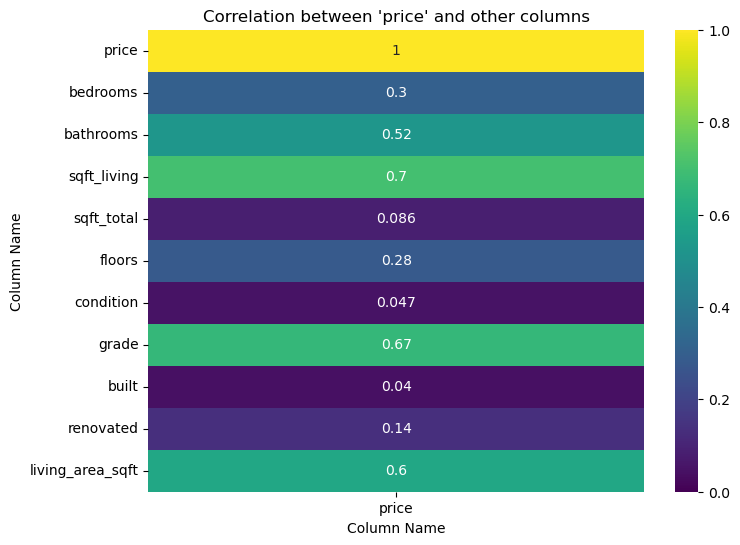

In [109]:
corr_matrix = housing_df.corr()
#You can choose a different colormap, such as 'viridis', 'plasma', etc.

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['price']], annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title("Correlation between 'price' and other columns")
plt.show()

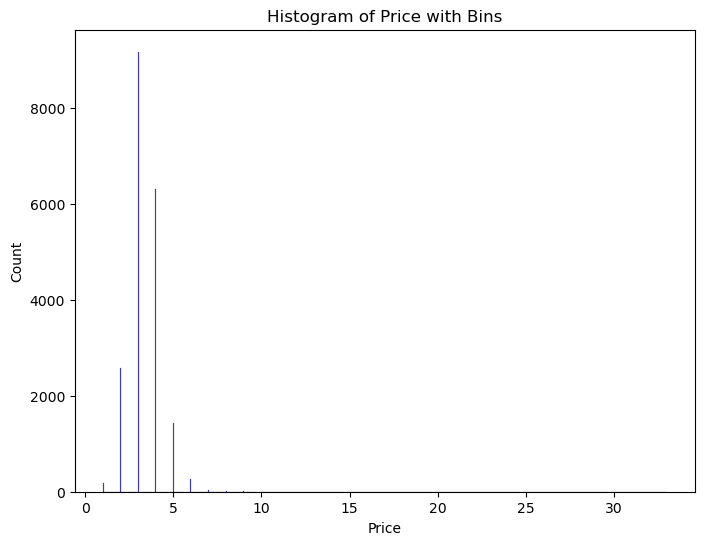

In [113]:
# Plot histogram for 'price'
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['bedrooms'],kde=False, color='blue', edgecolor='black')

# Show count per bin
plt.title('Histogram of Price with Bins')
plt.xlabel('Price')
plt.ylabel('Count')

# Display plot/
plt.show()

In [ ]:
for column in housing_df.columns:
    stat, p = shapiro(housing_df[column])
    print(f"{column}: p-value = {p}")
# If p < 0.05, the data is not normally distributed.

price: p-value = 5.254257360154457e-102
bedrooms: p-value = 6.102651774892385e-87
bathrooms: p-value = 1.938214000357259e-68
sqft_living: p-value = 7.956370246294424e-74
sqft_total: p-value = 4.597981789140974e-128
floors: p-value = 6.321380223941106e-100
condition: p-value = 3.832242453426089e-101
grade: p-value = 4.721741237787348e-79
built: p-value = 3.320760473513796e-57
renovated: p-value = 5.557467930736678e-129
living_area_sqft: p-value = 1.4700789349367244e-68
